# Spam Message Detection 
##### Group Members: Saurabh Kumar, Shiv Kumar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from wordcloud import WordCloud

## Data Cleaning and Analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.sample(5)

,label,message,length,punct
5273,ham,Its too late:)but its k.wish you the same.,42,4
1389,ham,Oh k.i think most of wi and nz players unsold.,46,2
2385,ham,"Sorry, I'll call later",22,2
4161,ham,i felt so...not any conveying reason.. Ese he....,63,9
1662,ham,"You aren't coming home between class, right? I...",75,4


In [ ]:
#missing values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
#duplicate values
df.duplicated().sum()

403

In [ ]:
#dropping the duplicate values
df = df.drop_duplicates(keep = 'first')
df.shape

(5169, 4)

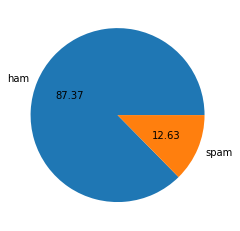

In [ ]:
#distribution representation
plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct = '%.2f')
plt.show()

In [ ]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

ham = ham.sample(spam.shape[0])

#balanced data
data = ham.append(spam, ignore_index = True)
data.shape

(1306, 4)

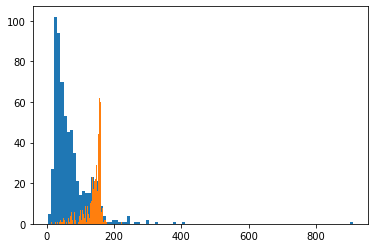

In [ ]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100)
plt.show()

## Data Preprocessing

In [ ]:
#downloading nltk dependencies
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def text_transform(txt):
  #converting to lowercase
  txt = txt.lower()

  #tokenization
  txt = nltk.word_tokenize(txt)

  #removing special charecters
  tmp = []
  for token in txt:
    if token.isalnum():
      tmp.append(token)

  txt = tmp[:]

  #removing stop words and punctutations
  tmp = []
  for token in txt:
    if token not in nltk.corpus.stopwords.words('english') and token not in string.punctuation:
      tmp.append(token)

  txt = tmp[:]

  #lemmatization
  lemmatizer = nltk.stem.WordNetLemmatizer()

  tmp = []
  for token in txt:
    tmp.append(lemmatizer.lemmatize(token, 'v'))

  return " ".join(tmp)

In [ ]:
data['trans_message'] = data['message'].apply(text_transform)

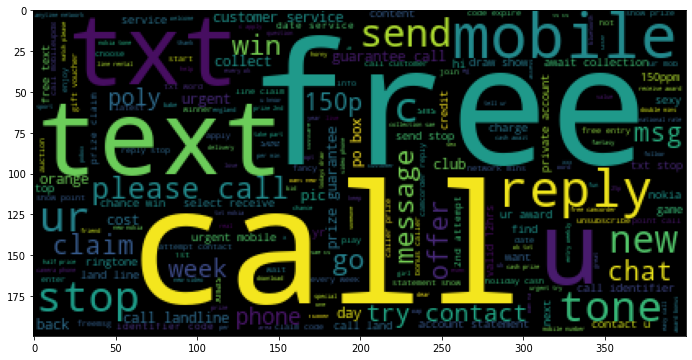

In [ ]:
wc = WordCloud()

#word cloud for spam
spam_wc = wc.generate(data[data['label'] == 'spam']['trans_message'].str.cat(sep = " "))

plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

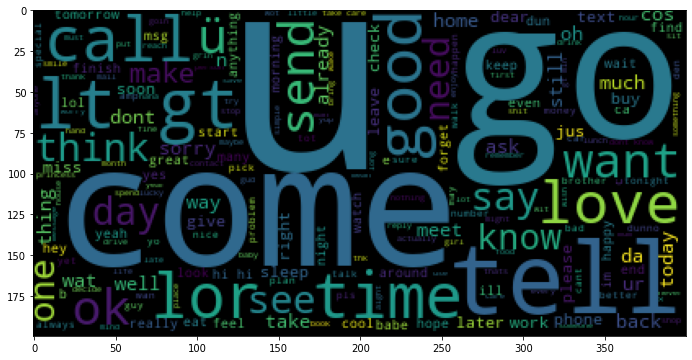

In [ ]:
#word cloud for ham
spam_wc = wc.generate(data[data['label'] == 'ham']['trans_message'].str.cat(sep = " "))

plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

## Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['trans_message'], data['label'], test_size = 0.3, shuffle = True, stratify = data['label'])

#pipeline
pipe = Pipeline([('tfid', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_estimators = 100))])

pipe.fit(X_train, y_train)

#prediction
y_pred = pipe.predict(X_test)

#confusion matrix
print(confusion_matrix(y_test, y_pred), '\n')

#accuracy
accuracy_score(y_test, y_pred)

[[188   8]
 [ 29 167]] 



0.9056122448979592